In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
dataset = pd.read_csv('D:/SocialNetworkAds.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
#X = dataset.iloc[:, [2, 3]].values
#y = dataset.iloc[:, 4].values

#print(X[:3, :])
#print('-'*15)
#print(y[:3])
dataset.shape

(400, 5)

In [9]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [11]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [13]:
dataset['Gender']=le.fit_transform(dataset['Gender'])

In [15]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [28]:
#Split dependent variable and independent variables
X = dataset.drop(['Purchased'], axis = 1)
y = dataset['Purchased']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
print('Dataset shape =',dataset.shape)
print('X_train shape =',X_train.shape)
print('X_test shape =',X_test.shape)
print('y_train shape =',y_train.shape)
print('y_test shape =',y_test.shape)





Dataset shape = (400, 5)
X_train shape = (300, 4)
X_test shape = (100, 4)
y_train shape = (300,)
y_test shape = (100,)


In [32]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [34]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


In [ ]:

print(y_pred[:20])
print(y_test[:20])

In [43]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
#from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[66  2]
 [ 8 24]]


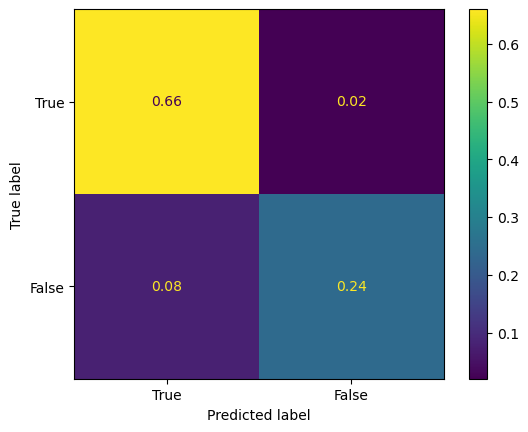

In [44]:
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['True','False'])
cmd.plot()


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100

